In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set two decimal points for display
pd.options.display.float_format = "{:.4f}".format

In [3]:
df = pd.read_csv('C:\\Users\\tsb7592\\Downloads\\ForJulyWeighting\\NIHTBv3_demos.csv')
print(df.shape)

(3904, 77)


In [4]:
df.columns

Index(['FinalPIN', 'inPersonWillingLoc', 'region', '18yrsPlus', 'sex', 'age',
       'highestEd', 'hispanic', 'race_AmericanIndian', 'race_Asian',
       'race_Black', 'race_MiddleEast', 'race_Hawaiian',
       'race_OtherPacificIsl', 'race_White', 'race_unknwnNoAns', 'asian_Chin',
       'asian_Indian', 'asian_Filip', 'asian_Viet', 'asian_Korea',
       'asian_Japan', 'asian_OtherSpec', 'race_ethnicity', 'reg_Age',
       'reg_Education_l', 'reg_MothersEducation_l', 'reg_FathersEducation_l',
       'reg_GuardiansEducation', 'reg_StartingLevelOverride', 'reg_Gender_l',
       'reg_Handedness_l', 'reg_Race_l', 'reg_Ethnicity_l',
       'reg_multiple_data', 'reg_age_months', 'sex_l', '18yrsPlus_l',
       'highestEd_l', 'inPersonWillingLoc_l', 'hispanic_l',
       'race_AmericanIndian_l', 'race_Asian_l', 'race_Black_l',
       'race_MiddleEast_l', 'race_Hawaiian_l', 'race_OtherPacificIsl_l',
       'race_White_l', 'race_unknwnNoAns_l', 'asian_Chin_l', 'asian_Indian_l',
       'asian_Fili

# Recode Parental Education and Self Education

In [5]:
parental_edu={1:"less than high school graduate", 2:"high school graduate", 3:"some college",
4:"four year or higher degree", 5:'four year or higher degree' }

self_edu={1:"less than high school graduate", 2:"high school graduate", 3:"some college",
4:"Bachelors/4-year degree", 5:'Advanced Degree'}

In [6]:
df1=df[df.age< 18].replace({"highestEdu": parental_edu})

In [7]:
df1['highestEdu']

0                 high school graduate
1                         some college
2                         some college
3                         some college
4                 high school graduate
                     ...              
3897    less than high school graduate
3899    less than high school graduate
3900    less than high school graduate
3901    less than high school graduate
3902    less than high school graduate
Name: highestEdu, Length: 2248, dtype: object

In [8]:
#Recode Edu to norming value
df2= df[df.age>=18]['highestEdu'].map(self_edu)

In [9]:
edulabel =df1['highestEdu'].append(df2)

In [10]:
df=df.drop(columns=['highestEdu'])

In [11]:
df =pd.merge(df,edulabel,left_index=True, right_index=True)

In [12]:
df.tail(10)

,FinalPIN,inPersonWillingLoc,region,18yrsPlus,sex,age,highestEd,hispanic,race_AmericanIndian,race_Asian,...,race_sg_l,asian_type_sg,asian_type_sg_l,race,race_l,gender_l,ethnicity_l,highestEdu_l,NIHTB+MyCog,highestEdu
3894,WPX40108,12,4,1,2,49,3.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Female,Not Hispanic,Some college,NaN,some college
3895,MSL09006,1,2,2,1,9,1.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Male,Not Hispanic,Less than highschool,NaN,less than high school graduate
3896,MSL16003,1,2,2,2,16,1.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Female,Not Hispanic,Less than highschool,NaN,less than high school graduate
3897,MSL08013,1,2,2,1,8,1.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Male,Not Hispanic,Less than highschool,NaN,less than high school graduate
3898,MSL85001,1,2,1,2,90,4.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Female,Not Hispanic,College,NaN,Bachelors/4-year degree
3899,MSL04001,1,2,2,1,4,1.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Male,Not Hispanic,Less than highschool,NaN,less than high school graduate
3900,MSL11012,1,2,2,1,11,1.0000,1.0000,0,0,...,Black or African-American,NaN,NaN,2,Black,Male,Not Hispanic,Less than highschool,NaN,less than high school graduate
3901,MSL12001,1,2,2,2,12,1.0000,1.0000,0,0,...,Black or African-American,NaN,NaN,2,Black,Female,Not Hispanic,Less than highschool,NaN,less than high school graduate
3902,MSL09013,1,2,2,1,9,1.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Male,Not Hispanic,Less than highschool,NaN,less than high school graduate
3903,MSL70106,1,2,1,1,74,4.0000,1.0000,0,0,...,White or Caucasian,NaN,NaN,1,White,Male,Not Hispanic,College,NaN,Bachelors/4-year degree


In [13]:
df.region.value_counts()

3    1436
4     940
2     866
1     662
Name: region, dtype: int64

In [14]:
keep =['FinalPIN','region', 'age','sex', 'highestEdu', 'hispanic', 'race_AmericanIndian', 'race_Asian',
       'race_Black', 'race_MiddleEast', 'race_Hawaiian',
       'race_OtherPacificIsl', 'race_White', 'race_unknwnNoAns']

In [15]:
df=df[keep].dropna()

# Label race/ethnicity

In [16]:
df.head()

,FinalPIN,region,age,sex,highestEdu,hispanic,race_AmericanIndian,race_Asian,race_Black,race_MiddleEast,race_Hawaiian,race_OtherPacificIsl,race_White,race_unknwnNoAns
0,MAP03001,2,3,2,high school graduate,1.0000,0,0,0,0,0,0,1,0
1,MAP03002,2,3,1,some college,1.0000,0,0,0,0,0,0,1,0
2,MAP03003,2,3,2,some college,1.0000,0,0,0,0,0,0,1,0
3,MAP03004,2,3,2,some college,1.0000,0,0,0,0,0,0,1,0
4,MAP03005,2,3,2,high school graduate,1.0000,0,0,0,0,0,0,1,0


In [17]:
df.hispanic.value_counts()

1.0000    3096
2.0000     484
5.0000     222
3.0000      81
4.0000      13
0.0000       6
Name: hispanic, dtype: int64

In [18]:
def label_race (row):
    #hispanic field does not equal 0 or 1
    if row['hispanic'] > 1 :
        return 'Hispanic'
    
    #hispanic=0 or 1, race_White=1 and/or race_MiddleEast=1, all other fields with prefix `race_` =0)
    elif row['race_White'] + row['race_MiddleEast'] >= 1 and row['race_AmericanIndian'] + row['race_Asian'] +row['race_Black'] + row['race_Hawaiian']+ row['race_OtherPacificIsl'] +row['race_unknwnNoAns']==0:
        return 'White'
    
    #race_Black=1, all other fields with prefix `race_` =0
    elif row['race_Black'] ==1  and row['race_White'] + row['race_MiddleEast'] + row['race_AmericanIndian'] + row['race_Asian'] + row['race_Hawaiian']+ row['race_OtherPacificIsl'] +row['race_unknwnNoAns']==0:
        return 'Black'
    
    #race_Asian=1, all other fields with prefix `race_` =0
    elif  row['race_Asian'] ==1  and row['race_White'] + row['race_MiddleEast'] + row['race_AmericanIndian'] + row['race_Black'] + row['race_Hawaiian']+ row['race_OtherPacificIsl'] +row['race_unknwnNoAns']==0:
        return 'AsianAmerican'
    
    else:
        return 'Other'    


In [19]:
df['Race/ethnicity'] =df.apply (lambda row: label_race(row), axis=1)

In [20]:
df['Race/ethnicity'].value_counts()

White            2162
Hispanic          800
Black             578
AsianAmerican     193
Other             169
Name: Race/ethnicity, dtype: int64

# Recode Region– Race/Ethnicity
there should be 20 race/ethnicity-by-region categories all together

In [21]:
df['region-race'] = df.region.map(str) + "-" + df['Race/ethnicity']

In [22]:
df['region-race'].unique()

array(['2-White', '2-Other', '2-Black', '2-Hispanic', '1-White',
       '2-AsianAmerican', '1-Black', '1-Hispanic', '1-Other',
       '1-AsianAmerican', '3-White', '3-Hispanic', '3-Black', '3-Other',
       '3-AsianAmerican', '4-Hispanic', '4-Black', '4-Other', '4-White',
       '4-AsianAmerican'], dtype=object)

In [23]:
df.head()

,FinalPIN,region,age,sex,highestEdu,hispanic,race_AmericanIndian,race_Asian,race_Black,race_MiddleEast,race_Hawaiian,race_OtherPacificIsl,race_White,race_unknwnNoAns,Race/ethnicity,region-race
0,MAP03001,2,3,2,high school graduate,1.0000,0,0,0,0,0,0,1,0,White,2-White
1,MAP03002,2,3,1,some college,1.0000,0,0,0,0,0,0,1,0,White,2-White
2,MAP03003,2,3,2,some college,1.0000,0,0,0,0,0,0,1,0,White,2-White
3,MAP03004,2,3,2,some college,1.0000,0,0,0,0,0,0,1,0,White,2-White
4,MAP03005,2,3,2,high school graduate,1.0000,0,0,0,0,0,0,1,0,White,2-White


In [24]:
def crosstab(df):
    a =df.groupby(['region','Race/ethnicity'])['age'].count().reset_index()
    a.columns=['region','Race/ethnicity','count']
    aa =a.pivot_table(values=['count'], index=['region'], columns=['Race/ethnicity'])
    aa=aa.fillna(0)
    aa.loc['Total',:]= aa.sum(axis=0)
    aa["sum"] = aa.sum(axis=1)
    
    return aa

In [25]:
dfr =crosstab(df)
dfr

count                                            sum
Race/ethnicity AsianAmerican    Black Hispanic    Other     White          
region                                                                     
1                    37.0000  89.0000 103.0000  21.0000  411.0000  661.0000
2                    21.0000 109.0000  76.0000  31.0000  628.0000  865.0000
3                    58.0000 329.0000 272.0000  67.0000  710.0000 1436.0000
4                    77.0000  51.0000 349.0000  50.0000  413.0000  940.0000
Total               193.0000 578.0000 800.0000 169.0000 2162.0000 3902.0000

# Recode Sex assigned at birth
there should be 8 sex-by-region categories all together

In [26]:
df["sex"].replace({1:'Male', 2:'Female'}, inplace=True)

In [27]:
df['region-sex'] = df.region.map(str) + "-" + df['sex']

In [28]:
df['region-sex'].unique()

array(['2-Female', '2-Male', '1-Female', '1-Male', '3-Male', '3-Female',
       '4-Male', '4-Female'], dtype=object)

# Split Age into 4 subests:ages 3-17, ages 18-24, ages 25-59, and ages 60+

In [29]:
bins= [3,18,25,60, 200]
labels = ['Child','YoungAdult','MiddleAdult','OlderAdult']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [30]:
Child= df[df['agegroup']=='Child']
Child.highestEdu.value_counts()

four year or higher degree        907
some college                      721
high school graduate              560
less than high school graduate     58
Name: highestEdu, dtype: int64

In [31]:
'''
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/tsb7592/Downloads/NIHTB_counts_July.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
aa.to_excel(writer, sheet_name='adults')
kk.to_excel(writer, sheet_name='kids')  
ad['highestEd'].value_counts().to_excel(writer, sheet_name='ad_edu') 
kd['highestEd'].value_counts().to_excel(writer, sheet_name='kids_edu') 
# Close the Pandas Excel writer and output the Excel file.
writer.save()
'''

"\n# Create a Pandas Excel writer using XlsxWriter as the engine.\nwriter = pd.ExcelWriter('C:/Users/tsb7592/Downloads/NIHTB_counts_July.xlsx', engine='xlsxwriter')\n\n# Write each dataframe to a different worksheet.\naa.to_excel(writer, sheet_name='adults')\nkk.to_excel(writer, sheet_name='kids')  \nad['highestEd'].value_counts().to_excel(writer, sheet_name='ad_edu') \nkd['highestEd'].value_counts().to_excel(writer, sheet_name='kids_edu') \n# Close the Pandas Excel writer and output the Excel file.\nwriter.save()\n"

# Save for R code

In [32]:
final =['FinalPIN','region', 'age', 'sex', 'highestEdu','region-race','region-sex','agegroup']

In [33]:
df[final].tail()

,FinalPIN,region,age,sex,highestEdu,region-race,region-sex,agegroup
3899,MSL04001,2,4,Male,less than high school graduate,2-White,2-Male,Child
3900,MSL11012,2,11,Male,less than high school graduate,2-Black,2-Male,Child
3901,MSL12001,2,12,Female,less than high school graduate,2-Black,2-Female,Child
3902,MSL09013,2,9,Male,less than high school graduate,2-White,2-Male,Child
3903,MSL70106,2,74,Male,Bachelors/4-year degree,2-White,2-Male,OlderAdult


In [35]:
df.groupby('agegroup')['region-race'].nunique()

agegroup
Child          20
YoungAdult     20
MiddleAdult    19
OlderAdult     18
Name: region-race, dtype: int64

In [38]:
df[df.agegroup=='MiddleAdult']['region-race'].unique()

array(['2-White', '2-Black', '2-Other', '2-Hispanic', '2-AsianAmerican',
       '1-Black', '1-AsianAmerican', '1-Hispanic', '1-White', '3-White',
       '3-Hispanic', '3-AsianAmerican', '3-Black', '3-Other', '4-Black',
       '4-Hispanic', '4-White', '4-AsianAmerican', '4-Other'],
      dtype=object)

In [37]:
df[df.agegroup=='OlderAdult']['region-race'].unique()

array(['2-White', '2-Hispanic', '2-Black', '2-AsianAmerican', '1-White',
       '1-Black', '1-Hispanic', '1-AsianAmerican', '3-White', '3-Black',
       '3-Other', '3-AsianAmerican', '3-Hispanic', '4-Black', '4-White',
       '4-Hispanic', '4-AsianAmerican', '4-Other'], dtype=object)

In [115]:
df[final].to_csv('C:/Users/tsb7592/Downloads/NIHTB_demoFinal_July.csv', index=False)

# Validate (After running the Rcode)

In [49]:
pedu={'less_HS_prop':"less than high school graduate", 'HS_GED_prop':"high school graduate", 'SomeCollege_prop':"some college",
'BA_more_prop':'four year or higher degree' }

sedu={'less_HS_prop':"less than high school graduate", 'HS_GED_prop':"high school graduate", 'SomeCollege_prop':"some college",
'Bachelors_prop':"Bachelors/4-year degree", 'Advanced_prop':'Advanced Degree'}

In [44]:
#Read the output files from R code
child = pd.read_csv('C:/Users/tsb7592/Downloads/child_weights.csv')
yadult = pd.read_csv('C:/Users/tsb7592/Downloads/youngadults_weights.csv')
madult = pd.read_csv('C:/Users/tsb7592/Downloads/middleadults_weights.csv')
oadult = pd.read_csv('C:/Users/tsb7592/Downloads/olderadults_weights.csv')

In [94]:
rv = child.append(yadult)
rv = rv.append(madult)
rv= rv.append(oadult)

In [98]:
rv.to_csv('C:/Users/tsb7592/Downloads/all_weights.csv', index= False)

In [83]:
import matplotlib.pyplot as plt

def histogram(df, label):
    # 16 = 4 * (1/.0.25)
    ax = df.hist(column='weights4', bins=16, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title(label)

        # Set x-axis label
        x.set_xlabel("Weights", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Count", labelpad=20, weight='bold', size=12)





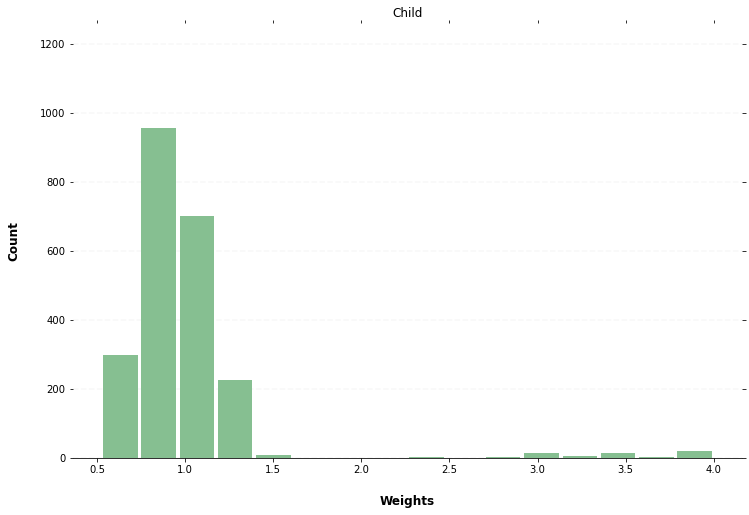

In [84]:
histogram(child, 'Child')

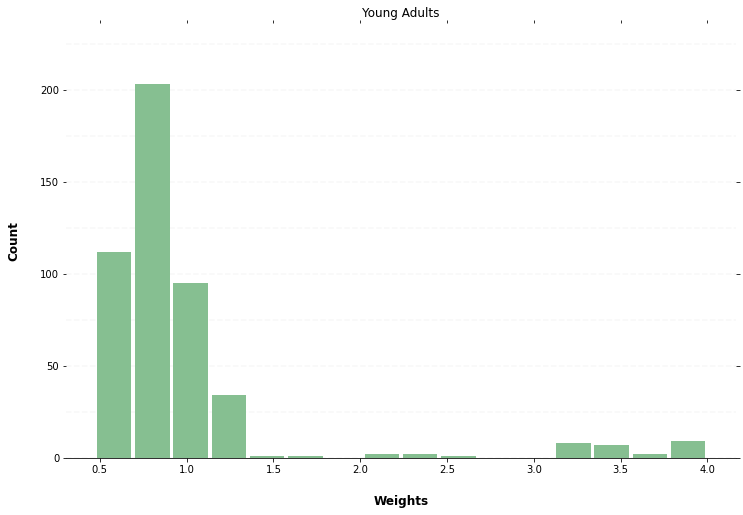

In [85]:
histogram(yadult, 'Young Adults')

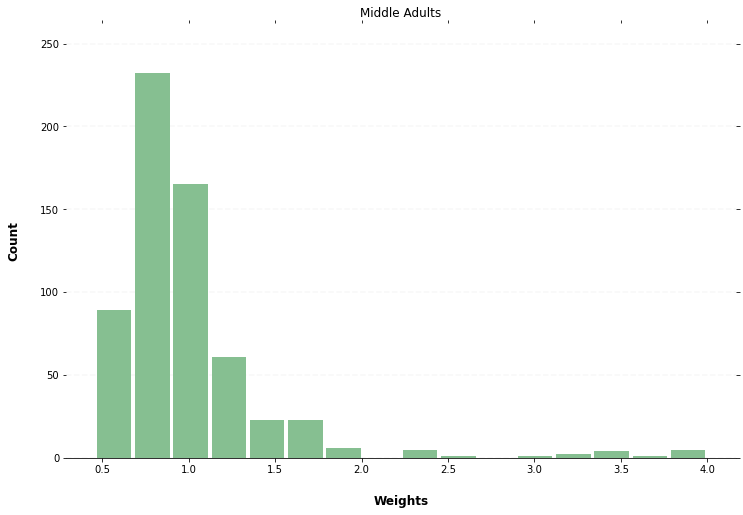

In [86]:
histogram(madult, 'Middle Adults')

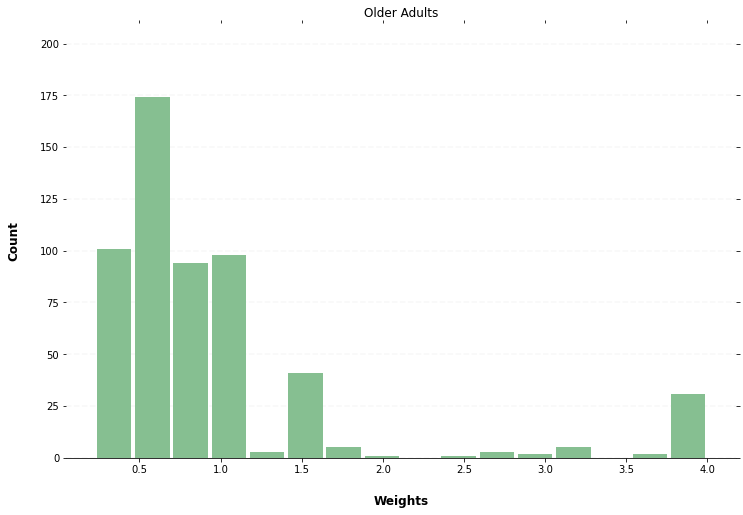

In [87]:
histogram(oadult, 'Older Adults')

In [89]:
tar = pd.read_csv('C:\\Users\\tsb7592\\Downloads\\ForJulyWeighting\\ChildTargets.csv')
ytar = pd.read_csv('C:\\Users\\tsb7592\\Downloads\\ForJulyWeighting\\YoungAdultTargets.csv')
mtar = pd.read_csv('C:\\Users\\tsb7592\\Downloads\\ForJulyWeighting\\MiddleAdultTargets.csv')
otar = pd.read_csv('C:\\Users\\tsb7592\\Downloads\\ForJulyWeighting\\OlderAdultTargets.csv')

In [51]:
import numpy as np

def obtained_weighted(data, target, edu):
    '''
    Fill the obtained N for race, sex and edu
    Use the raw counts to fill in the “unweighted_N” 
    
    '''
    total = data.shape[0]
    target = target.replace({"Target": edu})
    target['name'] = target.REGION.map(str) + "-" + target['Target']
    rr = data.groupby('region.race')['FinalPIN'].count().reset_index()
    rs = data.groupby('region.sex')['FinalPIN'].count().reset_index()
    re = data.groupby('highestEdu')['FinalPIN'].count().reset_index()
    
    comb = pd.merge(target, rr, left_on='name', right_on='region.race', how='left')
    comb['Obtained_N'].fillna(comb['FinalPIN'],inplace=True)
    
    comb = pd.merge(comb, rs, left_on='name', right_on='region.sex', how='left')
    comb['Obtained_N'].fillna(comb['FinalPIN_y'],inplace=True)
    
    comb = pd.merge(comb, re, left_on='Target', right_on='highestEdu', how='left')
    comb['Obtained_N'].fillna(comb['FinalPIN'],inplace=True)
    
    comb['Unweighted_Proportion' ] = comb['Obtained_N']/total
    #“unweighted_proportion” is the unweighted_N divided by the sum of the unweighted_n grouped-by characteristic. 
    rr = data.groupby('region.race')['weights4'].sum().reset_index()
    rs = data.groupby('region.sex')['weights4'].sum().reset_index()
    re = data.groupby('highestEdu')['weights4'].sum().reset_index()
    
    comb = pd.merge(comb, rr, left_on='name', right_on='region.race', how='left')
    comb['Weighted_Proportion'].fillna(comb['weights4'],inplace=True)
    
    comb = pd.merge(comb, rs, left_on='name', right_on='region.sex', how='left')
    comb['Weighted_Proportion'].fillna(comb['weights4_y'],inplace=True)
    
    comb = pd.merge(comb, re, left_on='Target', right_on='highestEdu', how='left')
    comb['Weighted_Proportion'].fillna(comb['weights4'],inplace=True)    
    
    comb['Weighted_Proportion' ] =comb['Weighted_Proportion' ] /total
    
    
    comb['Unweighted_Difference'] = comb['Unweighted_Proportion'] - comb['Proportion']
    comb['Weighted_Difference'] = comb['Weighted_Proportion'] - comb['Proportion']
    return comb.iloc[:,:10]

In [101]:
ctar =obtained_weighted(child, tar, pedu)
ctar.head()

,ageCat,REGION,Characteristic,Target,Proportion,Obtained_N,Unweighted_Proportion,Weighted_Proportion,Unweighted_Difference,Weighted_Difference
0,1,1,raceEth,AsianAmerican,0.0114,19.0000,0.0085,0.0114,-0.0029,0.0000
1,1,1,raceEth,Black,0.0199,52.0000,0.0232,0.0199,0.0033,0.0000
2,1,1,raceEth,Hispanic,0.0333,69.0000,0.0307,0.0333,-0.0026,0.0000
3,1,1,raceEth,Other,0.0066,20.0000,0.0089,0.0066,0.0023,0.0000
4,1,1,raceEth,White,0.0893,188.0000,0.0837,0.0893,-0.0056,0.0000


In [102]:
ytar =obtained_weighted(yadult, ytar, sedu)
ytar.head()

,ageCat,REGION,Characteristic,Target,Proportion,Obtained_N,Unweighted_Proportion,Weighted_Proportion,Unweighted_Difference,Weighted_Difference
0,2,1,raceEth,AsianAmerican,0.0122,9.0000,0.0189,0.0122,0.0067,0.0000
1,2,1,raceEth,Black,0.0216,13.0000,0.0273,0.0216,0.0057,0.0000
2,2,1,raceEth,Hispanic,0.0307,20.0000,0.0419,0.0307,0.0112,0.0000
3,2,1,raceEth,Other,0.0051,1.0000,0.0021,0.0051,-0.0030,0.0000
4,2,1,raceEth,White,0.1017,54.0000,0.1132,0.1017,0.0115,0.0000


In [103]:
mtar =obtained_weighted(madult, mtar, sedu)
mtar.head()

,ageCat,REGION,Characteristic,Target,Proportion,Obtained_N,Unweighted_Proportion,Weighted_Proportion,Unweighted_Difference,Weighted_Difference
0,2,1,raceEth,AsianAmerican,0.0122,8.0000,0.0129,0.0000,0.0007,-0.0122
1,2,1,raceEth,Black,0.0216,16.0000,0.0259,0.0000,0.0043,-0.0216
2,2,1,raceEth,Hispanic,0.0307,12.0000,0.0194,0.0000,-0.0113,-0.0307
3,2,all,raceEth,Other,0.0430,13.0000,0.0210,0.0001,-0.0220,-0.0429
4,2,1,raceEth,White,0.1017,71.0000,0.1149,0.0002,0.0132,-0.1015


In [104]:
otar =obtained_weighted(oadult, otar, sedu)
otar.head()

,ageCat,REGION,Characteristic,Target,Proportion,Obtained_N,Unweighted_Proportion,Weighted_Proportion,Unweighted_Difference,Weighted_Difference
0,2,1,raceEth,AsianAmerican,0.0122,1.0000,0.0018,0.0000,-0.0104,-0.0122
1,2,1,raceEth,Black,0.0216,8.0000,0.0143,0.0000,-0.0073,-0.0216
2,2,1,raceEth,Hispanic,0.0307,2.0000,0.0036,0.0000,-0.0271,-0.0307
3,2,all,raceEth,Other,0.0430,3.0000,0.0053,0.0000,-0.0377,-0.0430
4,2,1,raceEth,White,0.1017,98.0000,0.1747,0.0002,0.0730,-0.1015


In [105]:
ctar.to_csv('C:\\Users\\tsb7592\\Downloads\\ChildTargets.csv', index=False)
ytar.to_csv('C:\\Users\\tsb7592\\Downloads\\YoungAdultTargets.csv', index=False)
mtar.to_csv('C:\\Users\\tsb7592\\Downloads\\MiddleAdultTargets.csv', index=False)
otar.to_csv('C:\\Users\\tsb7592\\Downloads\\OlderAdultTargets.csv' ,index=False)

In [ ]:
kp = crosstab(kids)
kp

In [ ]:
ap = crosstab(adults,'weights.7a')
ap

In [ ]:
def crosstab_w(df, col='weights'):
    a =(df.groupby(['region','race'])[col].sum()/df[col].sum()).reset_index()
    a.columns=['region','race','Sum']
    aa =a.pivot_table(values=['Sum'], index=['region'], columns=['race'])
    return aa

In [ ]:
k7 = crosstab_w(kids)
k7

In [ ]:
a7=crosstab_w(adults, 'weights.7a')
a7

In [ ]:
b7 =(adults.groupby(['region'])['weights.7b'].count()/adults['weights.7b'].sum()).reset_index()
b7.columns=['region','Sum']
b77 =b7.pivot_table(values=['Sum'], index=['region'])
b77

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/tsb7592/Downloads/NIHTB_weights_output_April.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
kp.to_excel(writer, sheet_name='kids_unweighted')
ap.to_excel(writer, sheet_name='adults_unweighted')
k7.to_excel(writer, sheet_name='kids_obtained_weighted')
a7.to_excel(writer, sheet_name='adults_obtained_weighted_7a') 
b77.to_excel(writer, sheet_name='adults_obtained_weighted_7b') 

# Close the Pandas Excel writer and output the Excel file.
writer.save()